In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

### load metadata

In [95]:
# load metadata
BASE_DIR = os.path.dirname(os.getcwd())
METADATA_PATH = os.path.join(BASE_DIR, "data/metadata/train_metadata.csv")
metadata = pd.read_csv(METADATA_PATH)
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240002 entries, 0 to 240001
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   filename               240002 non-null  object
 1   filepath               240002 non-null  object
 2   format                 240002 non-null  object
 3   resolution             240002 non-null  object
 4   colour_mode            240002 non-null  object
 5   channels               240002 non-null  int64 
 6   capture_device         240002 non-null  object
 7   compression            240002 non-null  object
 8   file_size              240002 non-null  int64 
 9   split                  240002 non-null  object
 10  ground_truth           240002 non-null  int64 
 11  ground_truth_metadata  240002 non-null  object
 12  original_ground_truth  240002 non-null  object
dtypes: int64(3), object(10)
memory usage: 23.8+ MB
None


### data type check

In [96]:
metadata["ground_truth"] = metadata["ground_truth"].astype(int)
print(metadata["ground_truth"].value_counts())

ground_truth
1    120002
0    120000
Name: count, dtype: int64


### resolution check - width, height sepration

In [97]:
metadata["width"] = metadata["resolution"].str.split("x").str[0].astype(int)
metadata["height"] = metadata["resolution"].str.split("x").str[1].astype(int)

### visualisation setting

In [98]:
sns.set_style(style="whitegrid")

### fake & real data count

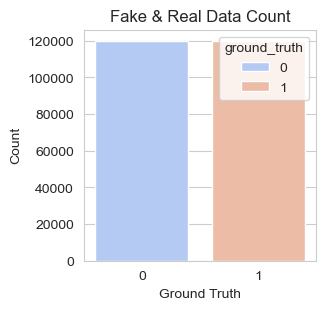

In [99]:
plt.figure(figsize=(3, 3))
sns.countplot(x="ground_truth", data=metadata, hue = "ground_truth", palette="coolwarm")
plt.title("Fake & Real Data Count")
plt.xlabel("Ground Truth")
plt.ylabel("Count")
plt.show()

### resolution distribution

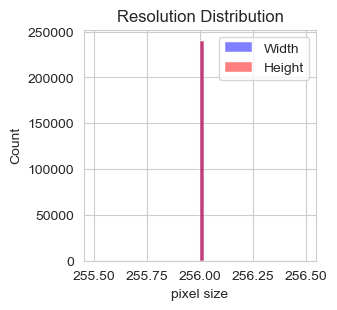

In [100]:
plt.figure(figsize=(3, 3))
sns.histplot(metadata["width"], bins=50, kde=True, color="blue", label="Width")
sns.histplot(metadata["height"], bins=50, kde=True, color="red", label="Height")
plt.title("Resolution Distribution")
plt.xlabel("pixel size")
plt.legend()
plt.show()

### fake & real file size comparison

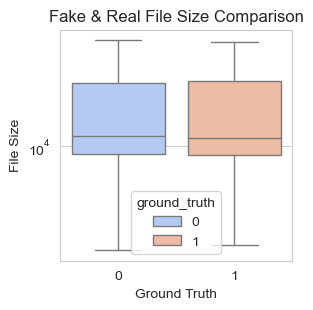

In [101]:
plt.figure(figsize=(3, 3))
sns.boxplot(x="ground_truth", y="file_size", data=metadata, hue = "ground_truth", palette="coolwarm")
plt.title("Fake & Real File Size Comparison")
plt.xlabel("Ground Truth")
plt.ylabel("File Size")
plt.yscale("log")
plt.show()

### fake & real compression ratio comparison

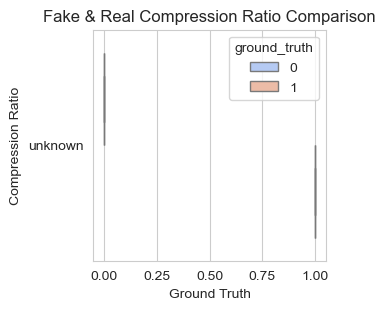

In [102]:
plt.figure(figsize=(3, 3))
sns.boxplot(x="ground_truth", y="compression", data=metadata, hue="ground_truth", palette="coolwarm")
plt.title("Fake & Real Compression Ratio Comparison")
plt.xlabel("Ground Truth")
plt.ylabel("Compression Ratio")
plt.show()

### heatmap of metadata

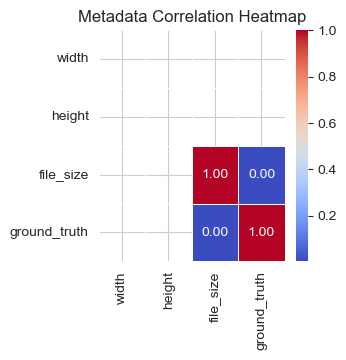

In [103]:
plt.figure(figsize=(3, 3))
numeric_columns = metadata.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_columns[["width", "height", "file_size", "ground_truth"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Metadata Correlation Heatmap")
plt.show()